<a href="https://colab.research.google.com/github/971933018/Predict-Numbers-in-a-Picture-NN-/blob/main/predict_number_with_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense  , Conv2D , MaxPooling2D , BatchNormalization , Dropout , Flatten 
from keras.datasets import mnist 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam 

In [16]:
(x_train , y_train ) , (x_test , y_test ) = mnist.load_data()
x_train = x_train.astype("float") 
x_test = x_test.astype("float")
x_train = x_train / 255.0 
x_test = x_test / 255.0 

In [17]:
print(x_train.shape )
print(x_test.shape )

(60000, 28, 28)
(10000, 28, 28)


In [18]:
x_train_copy = x_train.copy()
x_test_copy  = x_test.copy() 

In [19]:
x_train = x_train.reshape(-1 , 28 , 28 , 1 )
x_test  = x_test.reshape(-1 , 28 , 28 , 1 )

In [20]:
print(x_train.shape )
print(x_test.shape )

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [21]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [22]:
y_train = y_train.reshape(-1 , 1 )
y_test = y_test.reshape(-1 , 1 )

In [23]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [24]:
print(y_train[:10])
print("--"*20)
print(y_test[:10])


[[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]
 [4]]
----------------------------------------
[[7]
 [2]
 [1]
 [0]
 [4]
 [1]
 [4]
 [9]
 [5]
 [9]]


In [25]:
y_train = to_categorical(y_train , 10 )
y_test = to_categorical(y_test , 10 )

In [26]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
print(y_train.shape)

(60000, 10)


In [28]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
models = Sequential([
                     Conv2D(100 , (3,3) , activation="relu" , padding="same" , input_shape = x_train.shape[1:] ) , 
                     BatchNormalization() , 
                     Conv2D(80 , (3,3) , activation="relu" , padding="same"  ) , 
                     BatchNormalization() , 
                     MaxPooling2D(pool_size = (2,2)) , 


                     Conv2D(60 , (3,3) , activation="relu" , padding="same" ) , 
                     BatchNormalization() , 
                     Conv2D(40 , (3,3) , activation="relu" , padding="same") , 
                     BatchNormalization() , 
                     MaxPooling2D(pool_size = (2,2)) , 

                     Conv2D(30 , (3,3) , activation="relu" , padding="same" ) , 
                     BatchNormalization() , 
                     Conv2D(20 , (3,3) , activation="relu"  , padding="same") , 
                     BatchNormalization() , 
                     MaxPooling2D(pool_size = (2,2)) , 


                    Flatten() , 
                    
                    Dense(128 , activation="relu" ) , 
                    BatchNormalization() , 
                    Dropout(0.2) , 

                    Dense(50 , activation="relu" ) , 
                    BatchNormalization() , 
                    Dropout(0.2) , 


                    Dense(30 , activation="relu" ) , 
                    BatchNormalization() , 
                    Dropout(0.2) , 
                     
                    Dense(20 , activation="relu" ) , 
                    BatchNormalization() , 
                    Dropout(0.2) , 
                    Dense(10 , activation = "softmax")


])

In [31]:
models.compile(Adam(learning_rate=0.01 , decay = 0.01 / 25 ) , loss='categorical_crossentropy' , metrics = "acc")
alis = models.fit(x_train , y_train , epochs = 30 , batch_size=200 , validation_split= 0.2 )

Epoch 1/30
240/240 [==============================] - 36s 86ms/step - loss: 0.3725 - acc: 0.8925 - val_loss: 1.8425 - val_acc: 0.6119
Epoch 2/30
240/240 [==============================] - 19s 79ms/step - loss: 0.1008 - acc: 0.9753 - val_loss: 0.1656 - val_acc: 0.9578
Epoch 3/30
240/240 [==============================] - 19s 81ms/step - loss: 0.0708 - acc: 0.9827 - val_loss: 0.0634 - val_acc: 0.9840
Epoch 4/30
240/240 [==============================] - 19s 80ms/step - loss: 0.0587 - acc: 0.9861 - val_loss: 0.0844 - val_acc: 0.9820
Epoch 5/30
240/240 [==============================] - 19s 80ms/step - loss: 0.0463 - acc: 0.9886 - val_loss: 0.0401 - val_acc: 0.9910
Epoch 6/30
240/240 [==============================] - 19s 80ms/step - loss: 0.0421 - acc: 0.9898 - val_loss: 0.0420 - val_acc: 0.9912
Epoch 7/30
240/240 [==============================] - 19s 80ms/step - loss: 0.0364 - acc: 0.9910 - val_loss: 0.0406 - val_acc: 0.9917
Epoch 8/30
240/240 [==============================] - 19s 81ms

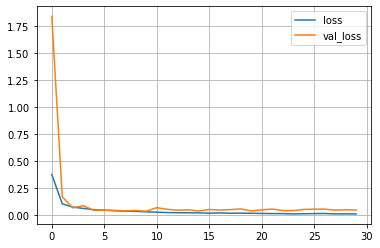

In [33]:
plt.plot(range(30) , alis.history["loss"] , label ="loss" )
plt.plot(range(30) , alis.history["val_loss"] , label ="val_loss" )
plt.legend()
plt.grid()
plt.show()


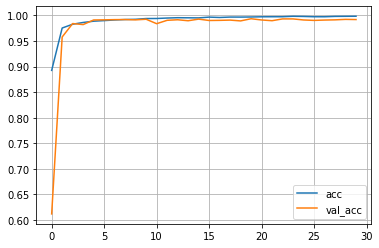

In [34]:
plt.plot(range(30) , alis.history["acc"] , label ="acc" )
plt.plot(range(30) , alis.history["val_acc"] , label ="val_acc" )
plt.legend()
plt.grid()
plt.show()

In [35]:
models.evaluate(x_test , y_test )

313/313 [==============================] - 4s 10ms/step - loss: 0.0339 - acc: 0.9937


[0.033941660076379776, 0.9937000274658203]

In [36]:
models.input 

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_6_input')>

In [40]:
y_pre_test = models.predict(x_test)

In [41]:
list_10 = []
for i in y_pre_test : 
  t = np.argmax(i)
  list_10.append(t) 

In [44]:
list_10 = np.array(list_10)
list_10 = list_10.reshape(-1 , 1 )
print(accuracy_score(y_test_copy , list_10))

0.9937


In [54]:
new = []
new.append(x_test_copy[0])
new = np.array(new)

In [55]:
new.shape

(1, 28, 28)

label is :  [7]


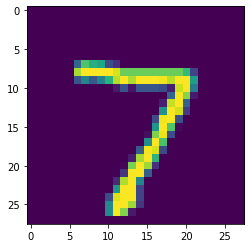

In [58]:
plt.imshow(new[0])
print("label is : " , y_test_copy[0])
plt.show()

In [59]:
models.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_6_input')>

In [60]:
new = new.reshape( -1 , 28 , 28 , 1 )

In [62]:
predict = models.predict(new)
print("real label is : " , y_test_copy[0])
print("predicted label is : " , np.argmax(predict) )

real label is :  [7]
predicted label is :  7


In [175]:
img = cv2.imread("/content/numbers.png" , 0  )


You Show a Picture *italicized text*

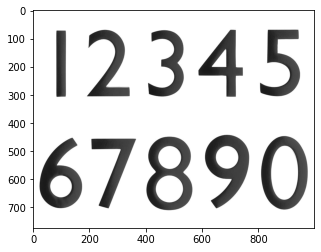

In [177]:
plt.imshow(img , cmap="gray")
plt.show()

In [144]:

edege = cv2.Canny(img , 100 , 255 )

contours , _ = cv2.findContours(edege , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE  )

list_picture = []

for i in contours : 
  x , y , w , h = cv2.boundingRect(i)
  img_crup  = img[y-10:y+h+10 , x-10 : x+w+10 ]
  img_crup  =( 255 - img_crup  ) 
  img_crup  = cv2.resize(img_crup , (28 ,28 ))
  list_picture.append(img_crup)





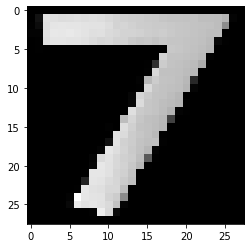

------------------------------------------------------------------------------------------------------------------------


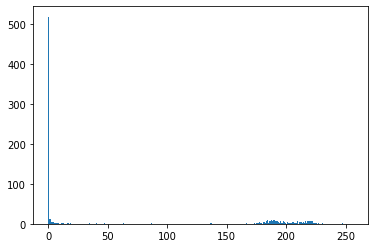

In [145]:
for i in list_picture : 
  plt.imshow(i , cmap="gray")
  plt.show()
  print('------' * 20 )
  plt.hist(i.ravel() , 256 , [0,256])
  break 

label is :  [3]


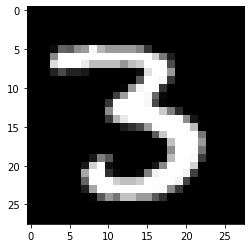

In [96]:
plt.imshow(x_train_copy[12] , cmap="gray" ) 
print("label is : " , y_train_copy[12])
plt.show()

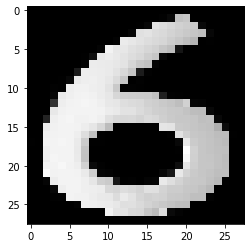

In [155]:
plt.imshow(list_picture[1] , cmap="gray")
plt.show()

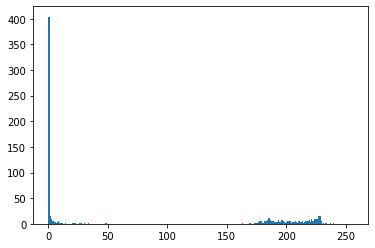

In [157]:
plt.hist(list_picture[1].ravel() , 256 , [0,256])
plt.show()


Label predicted is :  7


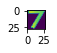

------------------------------------------------------------
Label predicted is :  5


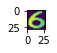

------------------------------------------------------------
Label predicted is :  8


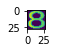

------------------------------------------------------------
Label predicted is :  0


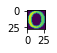

------------------------------------------------------------
Label predicted is :  9


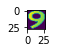

------------------------------------------------------------
Label predicted is :  6


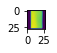

------------------------------------------------------------
Label predicted is :  3


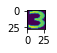

------------------------------------------------------------
Label predicted is :  4


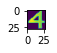

------------------------------------------------------------
Label predicted is :  2


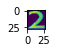

------------------------------------------------------------
Label predicted is :  5


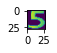

------------------------------------------------------------


In [174]:
for i in range(10) : 
  plt.subplot(10 , 1 , i+1 )
  #_ , thre = cv2.threshold(i , 50 , 255 , cv2.THRESH_BINARY )
  new_list = []
  new_list.append(list_picture[i] )
  new_list = np.array(new_list)
  new_list = new_list.reshape( -1 , 28 , 28 , 1 )
  predicted = models.predict(new_list)
  items = np.argmax(predicted)
  plt.imshow(list_picture[i])
  print("Label predicted is : " , items )
  

  plt.show() 
  print("---" * 20 )